# Trabajo integrador - Parte 2

# Aprendizaje Supervisado

**Nombre**: Simón Rodríguez

## Problema de regresión

Para la creación de los datasets y la manipulación de los mismos vamos a trabajar directamente con dos módulos includios en la carpeta utils.

En esta podemos encontrar:
 - generate_data: Esta función wrappea el método de _make_regression_ de scikit learn para devolver un dataframe con un problema de regresión basado en sus parámetros.
 - generate_outliers: Esta función genera outliers livianos y pesados en función de los parámetros que le demos de entrada.

In [5]:
from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

### Ejemplo de uso

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
## Vamos a crear un dataset primero.

data = generate_dataset(
    n_samples=1000,
    n_features=5,
    n_informative=2,
    n_targets=1,
    noise=0,
    output='dataframe'
)

## esto nos genera un dataset que contiene 5 features, 2 de los cuales son informativos, y 1 target.

data.head()

,x0,x1,x2,x3,x4,target
0,0.429742,0.251472,0.000870,1.295636,0.177326,41.993710
1,1.470760,-1.571929,0.460060,-1.832886,-0.096548,-10.318595
2,-0.129451,0.965602,2.434466,1.424704,-0.456365,53.292338
3,-0.577506,0.340512,0.582084,0.891326,0.119224,-13.471103
4,-0.787847,0.127761,-1.048391,1.515954,0.189284,-39.703243


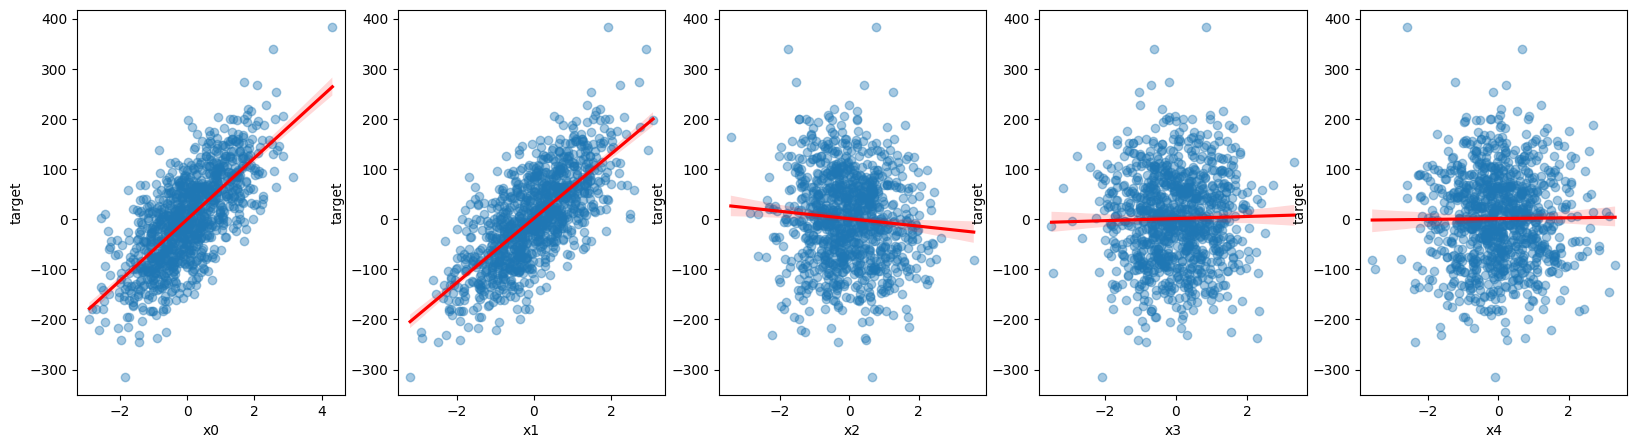

In [7]:
## vamos a visualizar estas variables
## creamos una figura de matplotlib que contenga 5 subplots, uno por cada feature:

fig, axes = plt.subplots(1, 5, figsize=(20, 5))

## Creamos un loop para iterar sobre cada feature y graficar la regresión lineal entre cada feature y el target:

for i, feature in enumerate(data.columns[:-1]):
    sns.regplot(x=feature,
                y='target',
                data=data,
                ax=axes[i],
                scatter_kws={'alpha': 0.4},
                line_kws={'color': 'red'},
                ci=95)
    


Ahora agregamos _outliers_ a un nuevo dataset

In [8]:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_informative=1,
    n_targets=1,
    noise=0,
    output='dataframe'
)


In [9]:
do1 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=False,
)
do2 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=True,
)
do3 = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.01,
    extreme_outliers=False,
    only_tails=True,
    two_tailed=False,
)

Text(0.5, 1.0, 'Outliers (one-tailed)')

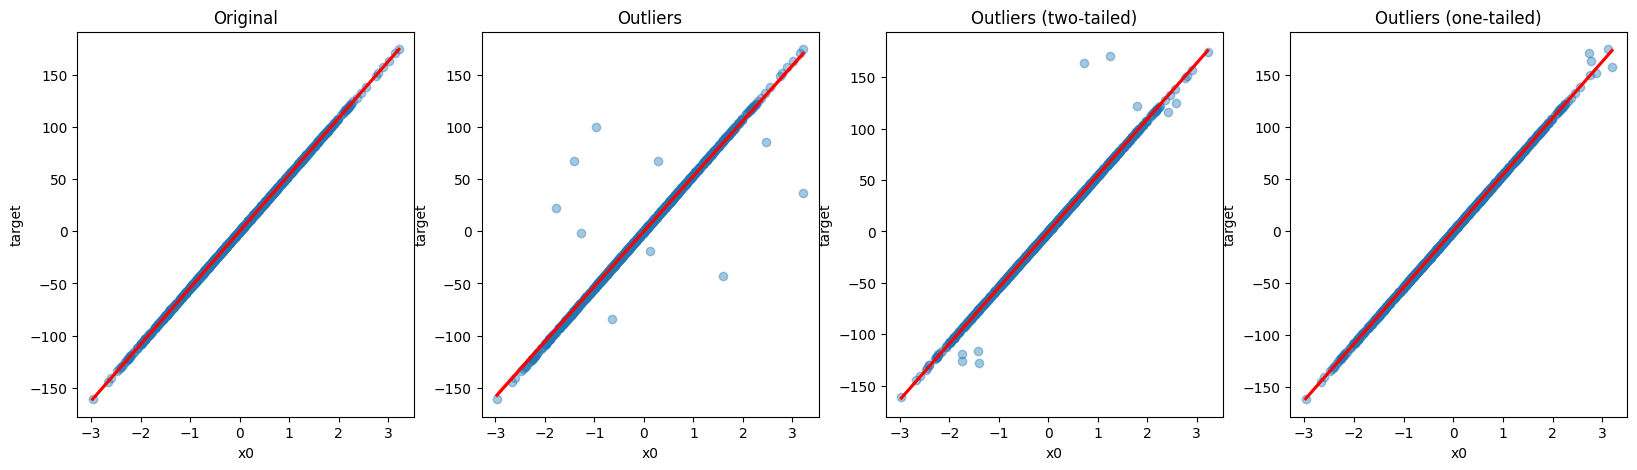

In [11]:
## vamos a visualizar estas los distintos datasets

fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=do1,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')

sns.regplot(x='x0',
            y='target',
            data=do2,
            ax=axes[2],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[2].set_title('Outliers (two-tailed)')

sns.regplot(x='x0',
            y='target',
            data=do3,
            ax=axes[3],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[3].set_title('Outliers (one-tailed)')


Text(0.5, 1.0, 'Outliers')

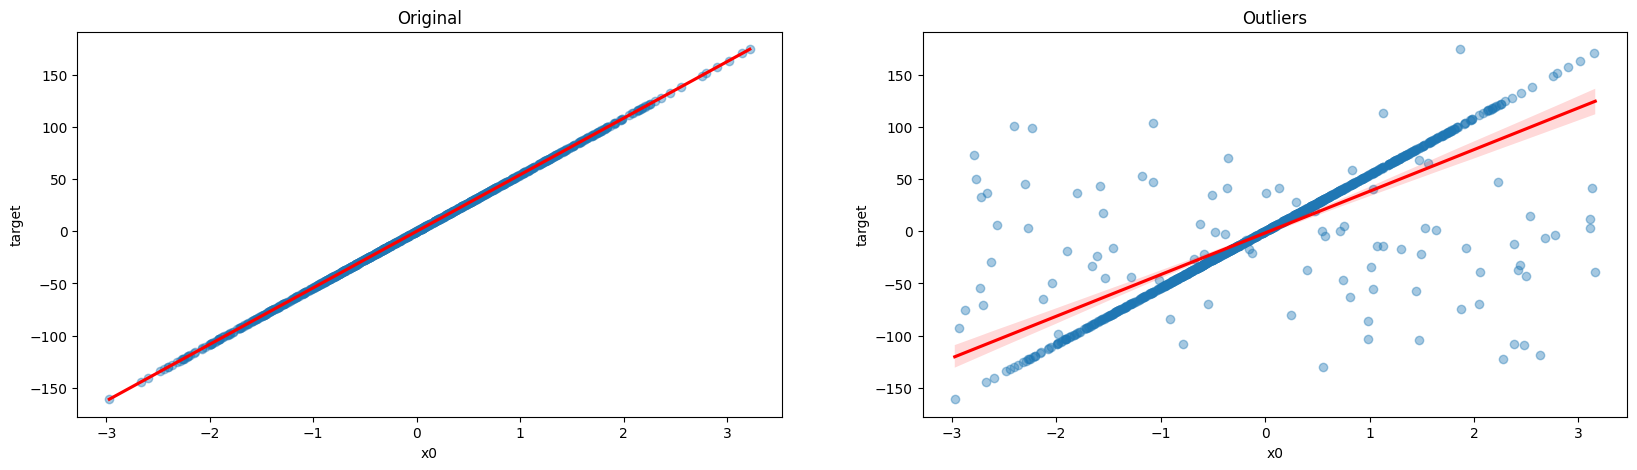

In [12]:
## y si lo queremos con mucho mas outliers?

doe = generate_outliers(
    df=data,
    columns=['x0'],
    percentage=0.1,
    extreme_outliers=True)

## vamos a visualizar este caso

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

sns.regplot(x='x0',
            y='target',
            data=data,
            ax=axes[0],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[0].set_title('Original')

sns.regplot(x='x0',
            y='target',
            data=doe,
            ax=axes[1],
            scatter_kws={'alpha': 0.4},
            line_kws={'color': 'red'},
            ci=95)
axes[1].set_title('Outliers')


### Ejercicio 4

Utilizando la funcion `generate_data` generar un problema de regresión multivariada en el cual cuente con N variables informativas y M variables no informativas.

Ejemplo:
```python
data = generate_dataset(n_samples=1000,
                    n_features=10,
                    n_informative=5,
                    n_targets=1,
                    noise=20.0,
                    random_state=42,
                    output='dataframe')

```

Dado un valor de _noise_ fijo, sin fijar _random_state_ (para poder asegurarnos
que los datos que generamos son distintos) realizaremos 100 simulaciones de este dataset.

En la simulación deberemos generar el dataset, hacer una división de train-test, ajustar
un modelo de regresión lineal multivariada y validar el mismo.

En cada iteración de esta simulación debemos guardar:

- Los coeficientes de la regresión.
- El RMSE de train y test.
- El MAE de train y test. 


> Qué pasa con los coeficientes de las variables no informativas? La regresión se ve afectada por estas variables?
> ***HINT:*** Utilice las distribuciones de los coeficientes para analizar y test de hipótesis para sacar conclusiones.

In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
import seaborn as sns
import statsmodels.api as sm
from scipy import stats

from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [125]:
## Parámetros de la simulación
n_exp = 100
n_samples = 1000
n_features = 10
n_informative = 2
n_targets = 1

noise = [0,10]
bias = [0,10]

# Listas para almacenar los resultados
coeficients_list = []
rmse_train_list = []
rmse_test_list = []
mae_train_list = []
mae_test_list = []
p_values = []

In [126]:
## Esqueleto de la simulación
for _ in tqdm(range(n_exp)):
    for b in bias:
        for n in noise:
            data = generate_dataset(
                n_samples=n_samples,
                n_features=n_features,
                n_informative=n_informative,
                n_targets=n_targets,
                noise=n,
                bias=b,
                output='dataframe'
            )

            # Dividir en conjuntos de entrenamiento y prueba
            X = data.drop(columns=['target'])
            y = data['target']
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

            # Ajustar el modelo de regresión lineal
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Guardar los coeficientes
            coeficients_list.append(model.coef_)

            # Realizar predicciones
            y_train_pred = model.predict(X_train)
            y_test_pred = model.predict(X_test)

            # Calcular métricas de rendimiento
            rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
            rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
            mae_train = mean_absolute_error(y_train, y_train_pred)
            mae_test = mean_absolute_error(y_test, y_test_pred)

            # Guardar las métricas
            rmse_train_list.append(rmse_train)
            rmse_test_list.append(rmse_test)
            mae_train_list.append(mae_train)
            mae_test_list.append(mae_test)

            # #extract p-values for all predictor variables
            # for x in range (0, n_features+1):
            #     p_values.append(model.pvalues[x])

100%|██████████| 100/100 [00:02<00:00, 35.18it/s]


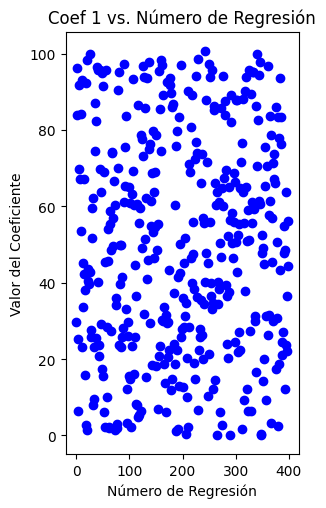

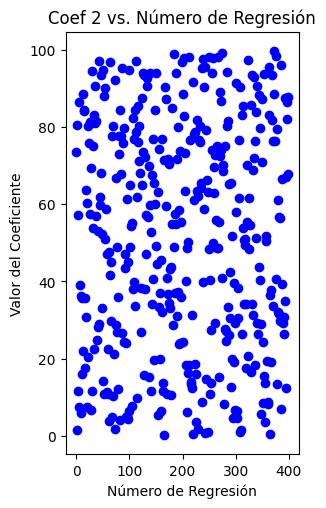

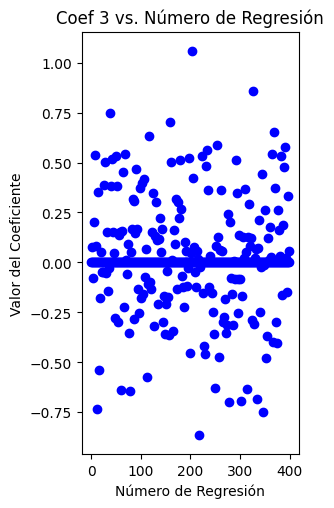

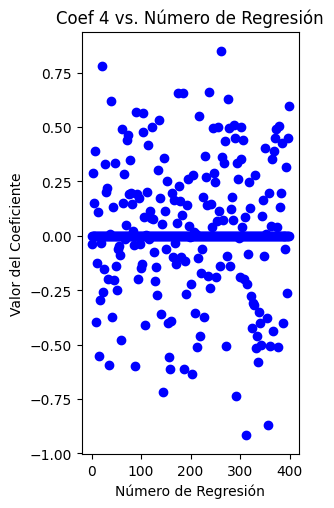

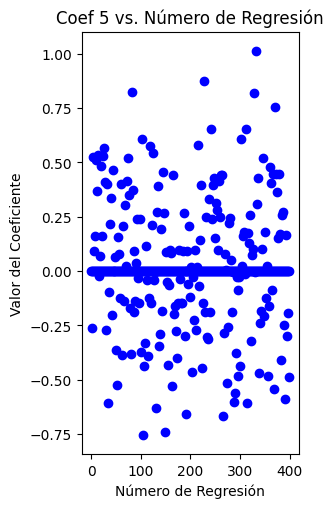

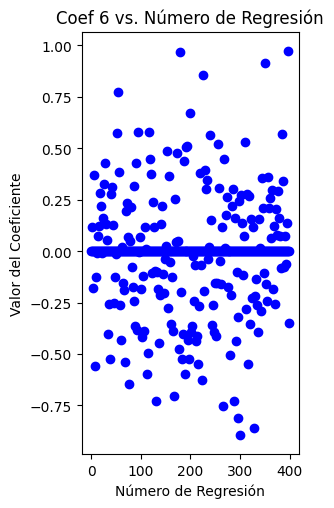

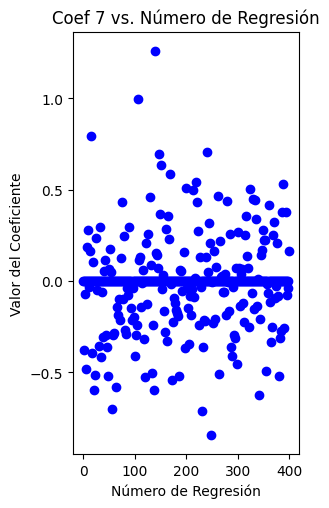

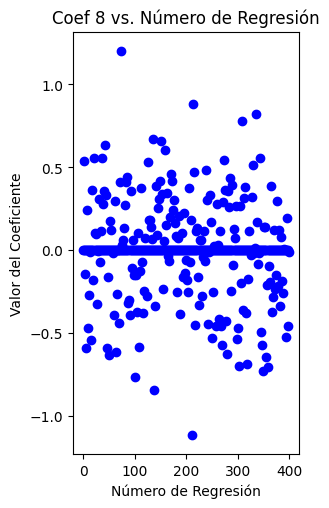

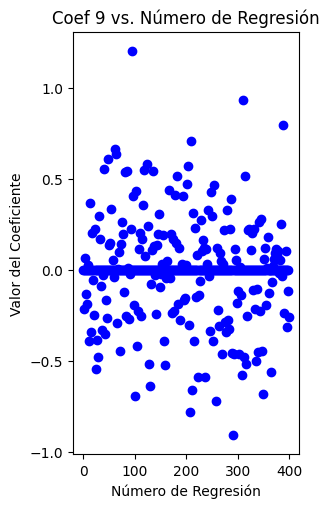

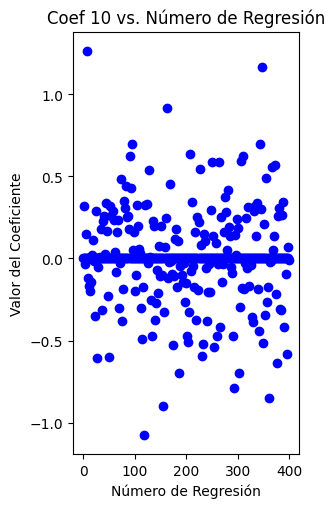

In [128]:
# Nombres de los coeficientes
coeficient_names = [f'Coef {i + 1}' for i in range(len(coeficients_list[0]))]

# Crear un gráfico por cada coeficiente
for coef_idx, coef_name in enumerate(coeficient_names):
    plt.figure(figsize=(4, 6))
    for reg_idx, coef_set in enumerate(coeficients_list):
        plt.scatter(reg_idx, coef_set[coef_idx], color='Blue')
    plt.xlabel('Número de Regresión')
    plt.ylabel('Valor del Coeficiente')
    plt.title(f'{coef_name} vs. Número de Regresión')
    plt.tight_layout(pad=4.0)
    plt.show()

**Conclusión:** Se puede observar que los coeficientes del 3 al 10 son en su mayoría cercanos al 0, por lo que no tendrían mucha influencia sobre el modelo.

In [51]:
coeficients_list

[array([ 6.10950666e+01,  4.86755108e+00, -1.70974346e-14,  1.00475184e-14,
         2.63677968e-15,  1.04360964e-14, -1.42108547e-14, -8.21565038e-15,
        -2.88657986e-15,  1.45439216e-14]),
 array([ 7.18141559e+01,  8.69271952e+01,  5.10434404e-01, -1.84840501e-01,
         2.59176524e-01, -3.83122492e-01, -5.76140501e-01,  5.04818496e-01,
        -2.28051721e-01,  2.85067629e-02]),
 array([ 7.05739495e+01,  8.58833711e+01,  0.00000000e+00, -1.42108547e-14,
         7.10542736e-15,  7.10542736e-15,  3.55271368e-15,  1.77635684e-15,
        -1.50990331e-14, -1.42108547e-14]),
 array([ 7.74855901e+01,  4.85137727e+01,  8.87446331e-01, -8.57752600e-02,
        -1.53857679e-01,  5.84455935e-01,  1.00816063e-01, -7.28607835e-02,
        -6.01316830e-01, -3.92064687e-01]),
 array([ 4.07604554e+01,  1.51001491e+01,  6.21724894e-15,  1.77635684e-15,
         5.32907052e-15, -7.54951657e-15, -1.21569421e-14, -6.21724894e-15,
        -2.51187959e-15, -6.66133815e-15]),
 array([ 1.64656514e

In [ ]:
import scipy

# Test de Hipótesis

for coef_idx in range(len(coeficients_list[0])):
    coef_values = np.array([])
    for coef_set in coeficients_list:
        coef_values = np.append(coef_values, coef_set[coef_idx])

    print(coef_values)
    p_value = scipy.stats.f_oneway(np.arange(coef_values))

    if p_value < 0.05:
        print(f'El coeficiente {coef_idx + 1} es estadísticamente significativo (p-value: {p_value})')
    else:
        print(f'El coeficiente {coef_idx + 1} no es estadísticamente significativo (p-value: {p_value})')


### Ejercicio 5


Utilizando la funcion `generate_outliers` generar puntos extremos dentro de los datos que generamos anteriormente. En este ejercicio dejar setteado `extreme_outliers` como `False` y observe como variando el porcentaje de los mismos la regresión comienza a afectarse.

Pasos:

1. Generamos un dataset de regresion lineal simple (1 feature y 1 target value) con `noise` fijo en 0.5.
2. Generamos outliers fijando `extreme_outliers`.
2. Probar los distintos regresores a ver como se comportan frente a estos datasets anómalos.
3. Simular con multiples porcentajes de outliers (desde 1% hasta 10%). Qué pasa con los modelos?

Los modelos a utilizar en este problema son:

    - Regresion Lineal simple
    - Regresion de Huber
    - Regresión Ridge

In [162]:
import numpy as np
from sklearn.linear_model import LinearRegression, HuberRegressor, RidgeCV

from utils.data_generation import generate_dataset
from utils.data_manipulation import generate_outliers

In [261]:
# Parámetros de la simulación
outlier_percentages = np.arange(0.01, 0.11, 0.01)  # Desde 1% hasta 10%
noise = 0.5  # Valor fijo de noise
n_samples = 500
n_features = 1
n_targets = 1

# Modelos a utilizar
models = {
    'Linear Regression': LinearRegression(),
    'Huber Regressor': HuberRegressor(),
    'Ridge Regression': RidgeCV()
}

# Diccionario para almacenar los resultados
results = {
    'Model': [],
    'Outlier Percentage': [],
    'Mean RMSE Train': [],
    'Mean RMSE Test': []
}

data = generate_dataset(
    n_samples=n_samples,
    n_features=n_features,
    n_targets=n_targets,
    noise=noise,
    output='dataframe'
)


for outlier_percentage in outlier_percentages:

    do = generate_outliers(
                    df=data,
                    columns=['x0'],
                    percentage=outlier_percentage,
                    extreme_outliers=False,
                    only_tails=False
                )

    X = np.array(do['x0']).reshape(-1, 1)
    y = np.array(do['target'])

    # Dividir en conjuntos de entrenamiento y prueba
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

    for model_name, model in models.items():

        # Ajustar el modelo
        model.fit(X_train, y_train)

        # Realizar predicciones
        y_test_pred = model.predict(X_test)
        y_train_pred = model.predict(X_train)

        # Calcular RMSE
        rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
        rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))

        # Almacenar resultados
        results['Model'].append(model_name)
        results['Outlier Percentage'].append(outlier_percentage)
        results['Mean RMSE Train'].append(rmse_train)
        results['Mean RMSE Test'].append(rmse_test)

# Convertir el diccionario de resultados en un DataFrame
results_df = pd.DataFrame(results)


In [263]:
outlier_percentages

array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ])

In [264]:
results_df

,Model,Outlier Percentage,Mean RMSE Train,Mean RMSE Test
0,Linear Regression,0.01,4.989043,1.269584
1,Huber Regressor,0.01,5.120257,0.574726
2,Ridge Regression,0.01,4.989052,1.278139
3,Linear Regression,0.02,16.029967,4.250658
4,Huber Regressor,0.02,16.581409,0.574528
5,Ridge Regression,0.02,16.030220,4.338679
6,Linear Regression,0.03,12.008028,10.917087
7,Huber Regressor,0.03,12.304824,10.848877
8,Ridge Regression,0.03,12.008396,10.930490
9,Linear Regression,0.04,17.978972,7.627328


**Conclusión**: Con poco porcentaje de Outliers, la Regresión de Huber produce mejores predicciones que la Regresión Lineal Simple y la de Ridge. Sin embargo, a medida que aumentan los outliers, la regresión de Huber produce peores predicciones en comparación con las regresiones lineal y de Ridge, las cuales dan predicciones con un error similar entre sí.

## Problema de Clasificación

### Ejercicio 6

En este ejercicio vamos a jugar un poco con descenso de gradiente. Para esto consideremos lo visto en clase que es el problema de regresión.

Como paso inicial, vamos a sacarnos de encima la parte teórica. Recordemos que partimos del siguiente modelo

$$
y = \beta_0 + \beta_1 \cdot x
$$

En este caso nuestra función objetivo a optimizar será:

$$
MSE = ||y-\hat{y}||^2
$$


Para calcular el gradiente de la función de error cuadrático medio (MSE) con respecto a los parámetros $\beta_0$ y $\beta_1$, es útil primero expresar la función de coste de forma más explicita. Dado que $\hat{y} = \beta_0 + \beta_1 \cdot x$, podemos reescribir la función MSE como sigue:

$$
MSE(\beta_0, \beta_1) = \frac{1}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)^2
$$

Aquí, $N$ es el número de observaciones en el conjunto de datos y $y_i$ y $x_i$ son el valor observado y el valor de la característica correspondiente para la i-ésima observación.

El gradiente de la función de coste está compuesto por las derivadas parciales de la función de coste con respecto a cada uno de los parámetros. Así, el gradiente es un vector de la forma:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{\partial MSE}{\partial \beta_0}, \frac{\partial MSE}{\partial \beta_1} \right]
$$

Las derivadas parciales se pueden calcular como sigue:

$$
\frac{\partial MSE}{\partial \beta_0} = \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

$$
\frac{\partial MSE}{\partial \beta_1} = \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i)
$$

Así que finalmente tenemos:

$$
\nabla MSE(\beta_0, \beta_1) = \left[ \frac{-2}{N} \sum_{i=1}^{N} (y_i - \beta_0 - \beta_1 \cdot x_i), \frac{-2}{N} \sum_{i=1}^{N} x_i \cdot (y_i - \beta_0 - \beta_1 \cdot x_i) \right]
$$

El cálculo del gradiente se usa en el descenso de gradiente para actualizar los parámetros $\beta_0$ y $\beta_1$ en cada iteración, en dirección opuesta al gradiente, para minimizar la función de coste.

Estos cálculos se pueden implementar en código Python de la siguiente manera:

```python
def gradient(X, y, beta0, beta1):
    N = len(y)
    y_hat = beta0 + beta1 * X

    d_beta0 = (-2/N) * np.sum(y - y_hat)
    d_beta1 = (-2/N) * np.sum(X * (y - y_hat))

    return d_beta0, d_beta1
```

Ahora, si quisieramos realizar esto de manera matricial, podemos hacer lo siguiente:

Primero, necesitamos cambiar la representación de nuestros datos. Podemos agregar un vector de unos a nuestra matriz de características para representar el término de intersección $\beta_0$. De esta manera, $X$ toma esta forma:

$$
X = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix}
$$

Y nuestro vector de parámetros $\theta$ se verá así:

$$
\theta = \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Entonces, nuestra predicción $\hat{y}$ se calcula como $X\theta$:

$$
\hat{y} = X\theta = \begin{bmatrix}
1 & x_1 \\
1 & x_2 \\
\vdots & \vdots \\
1 & x_N \\
\end{bmatrix} \cdot \begin{bmatrix}
\beta_0 \\
\beta_1 \\
\end{bmatrix}
$$

Nuestra función de coste MSE se ve de la siguiente manera en forma matricial:

$$
MSE(\theta) = \frac{1}{N} (y - X\theta)^T (y - X\theta)
$$

Las derivadas parciales de esta función de coste con respecto a los parámetros se pueden calcular de la siguiente manera:

$$
\frac{\partial MSE}{\partial \theta} = \frac{-2}{N} X^T (y - X\theta)
$$


Esto se puede implementar en Python de la siguiente manera:

In [83]:
import numpy as np

def gradient(X: np.ndarray, y: np.ndarray, theta: np.ndarray) -> np.ndarray:
    """
    Esta función calcula el gradiente de la función de coste del error cuadrático medio (MSE)
    para una regresión lineal simple. La función toma como entrada la matriz de características X,
    el vector de observaciones y el vector de parámetros theta, y devuelve el gradiente, que
    es un vector de las mismas dimensiones que theta.

    Params:
    X : numpy.ndarray
        La matriz de características extendida que incluye un vector de unos. De tamaño (N, d),
        donde N es el número de observaciones y d es el número de características (incluyendo el
        término de intersección).

    y : numpy.ndarray
        El vector de observaciones. De tamaño (N,), donde N es el número de observaciones.

    theta : numpy.ndarray
        El vector de parámetros. De tamaño (d,), donde d es el número de características
        (incluyendo el término de intersección).

    Returns:
    grad : numpy.ndarray
        El gradiente de la función de coste. Un vector de las mismas dimensiones que theta.

    Examples:
    >>> X = np.array([[1, 1], [1, 2], [1, 3]])
    >>> y = np.array([2, 3, 4])
    >>> theta = np.array([0, 0])
    >>> gradient(X, y, theta)
    array([-4., -8.])
    """
    N = len(y)
    y_hat = X.dot(theta)
    grad = (-2 / N) * X.T.dot(y - y_hat)

    return grad

In [94]:
X = np.array([[1, 1], [1, 2], [1, 3]])
y = np.array([2, 3, 4])
theta = np.array([0, 0])
gradient(X, y, theta)

[0 0 0]


array([ -6.        , -13.33333333])

In [97]:
theta.shape

(2,)


Aquí, `X` es la matriz de características extendida que incluye un vector de unos, `y` es el vector de observaciones, y `theta` es el vector de parámetros. La función devuelve el gradiente, que es un vector de las mismas dimensiones que `theta`.

#### Gradiente Descendente

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _GD_ que compute el gradiente descendente. Debe tener condición de frenado
por nr de épocas pero también por tolerancia.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [2]:
from utils.data_generation import generate_dataset

# Generar un dataset:
data = generate_dataset(
    n_samples=1000,
    n_features=1,
    n_targets=1,
    noise=1,
    bias=10,
    random_state=7,
    output='dataframe'
)

In [44]:
import numpy as np
from sklearn.model_selection import train_test_split

# Preparamos los vectores
X = np.array(data['x0']) # [[1,x0], [1,x1]]
X = np.column_stack((np.ones(len(X)), X))

y = np.array(data['target']) # [1,2]

# Inicializamos el vector theta al azar
theta = np.random.randint(low = 1, high = 20, size = (2,)) # [b0,b1] al azar


def GD(X: np.ndarray, y: np.ndarray, theta: np.ndarray, epocas, learning_rate, tolerancia) -> np.ndarray:
    
    train_loss = []
    test_loss = []
    prev_mse = float('inf')

    # Dividimos el dataset en train y test, pero usaremos el dataset completo.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)
    

    for epoca in range(epocas):
        N = len(y)
        N_test = len(y_test)
        y_hat = X.dot(theta)
        grad = (-2 / N) * X.T.dot(y - y_hat)

        # hace la reducción
        theta = theta - (learning_rate * grad)
        
        # Calculamos la función de costo (Error Cuadrático Medio - MSE) para train y test
        mse_train = np.sum((X.dot(theta) - y) ** 2) / (2 * N)
        mse_test = np.sum((X_test.dot(theta) - y_test) ** 2) / (2 * N_test)

        # Guardamos la información de las pérdidas en train y test
        train_loss.append(mse_train)
        test_loss.append(mse_test)

        epoch = epoca
        
        # Verificar la condición de frenado por tolerancia
        if abs(prev_mse - mse_train) < tolerancia:
            break
        
        prev_mse = mse_train
    
    return theta, train_loss, test_loss, epoch

In [75]:
epocas = 1000
learning_rate = 0.01
tolerancia = 0.000001

mejor_param, train_loss, test_loss, epoca = GD(X, y, theta, epocas, learning_rate, tolerancia)

print('Los mejores parámetros son: ', mejor_param)
print('Se obtuvieron en la epoca: ', epoca+1)
print(train_loss)
print(test_loss)

Los mejores parámetros son:  [ 9.96342551 26.05306271]
Se obtuvieron en la epoca:  406
[107.41442176615595, 103.42126372955462, 99.57753421517556, 95.87763054177962, 92.31616051863325, 88.88793452105328, 85.58795786492304, 82.41142346887602, 79.35370479327123, 76.41034904549662, 73.57707064153368, 70.8497449140969, 68.22440205802992, 65.69722130399181, 63.2645253118073, 60.922774775181516, 58.668563229793655, 56.49861205708646, 54.4097656763594, 52.39898691805349, 50.46335257138417, 48.60004909973856, 46.80636851750204, 45.07970442221899, 43.41754817622324, 41.81748523209552, 40.277191596518605, 38.79443042730701, 37.36704875858416, 35.99297434927184, 34.67021265023812, 33.396843885627035, 32.17102024406187, 30.990963175577026, 29.854960790290413, 28.761365354978608, 27.708590883862446, 26.69511082005006, 25.719455804218885, 24.78021152724708, 23.87601666362924, 23.005560882631002, 22.167582934251882, 21.36086880717679, 20.58424995600277, 19.8366015951303, 19.116841056807022, 18.423926

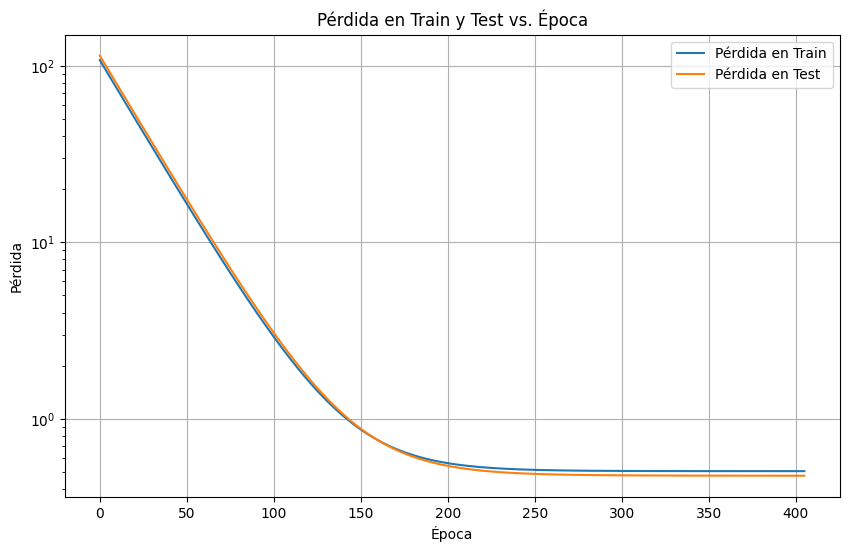

In [76]:
import matplotlib.pyplot as plt

# Graficamos las funciones de costo en train y test vs. época
plt.figure(figsize=(10, 6))
plt.plot(range(epoca+1), train_loss, label='Pérdida en Train')
plt.plot(range(epoca+1), test_loss, label='Pérdida en Test')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.title('Pérdida en Train y Test vs. Época')
plt.legend()
plt.yscale('log') # para que se observe mejor el efecto
plt.grid()
plt.show()

#### Gradiente Descendente Estocástico

Ahora que sabemos calcular el gradiente, vamos a:

1. Crear una función _SGD_ que compute el gradiente descendente estocástico.
2. Generamos un dataset (con _generate_dataset_ de los ejercicios anteriores, utilizando un bias conocido y solo 1 feature)
3. Inicializamos un vector $(\beta_0, \beta_1)$ al azar.
4. Tratamos de calcular los mejores parámetros con el algoritmo.
5. Guardamos la función de perdida en train y test en cada época.

In [18]:
import numpy as np
from sklearn.model_selection import train_test_split

# Preparamos los vectores
X = np.array(data['x0']) # [[1,x0], [1,x1]]
X = np.column_stack((np.ones(len(X)), X))

y = np.array(data['target']) # [1,2]

# Inicializamos el vector theta al azar
theta = np.random.randint(low = 1, high = 20, size = (2,)) # [b0,b1] al azar


def SGD(X: np.ndarray, y: np.ndarray, theta: np.ndarray, epocas, learning_rate, tolerancia, n_samples) -> np.ndarray:
    
    train_loss = []
    test_loss = []
    prev_mse = float('inf')

    # Dividimos el dataset en train y test, pero usaremos el dataset completo.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=10)
    

    for epoca in range(epocas):
        
        # Mezclamos X, Y manteniendo la misma permutación
        indices = np.arange(X.shape[0])
        np.random.shuffle(indices)

        X = X[indices]
        y = y[indices]

        batch_size = len(X)//n_samples

        for sample in range(n_samples):
            
            start = sample*batch_size
            stop = (sample*batch_size) + batch_size

            X_batch = X[start:stop]
            y_batch = y[start:stop]

            N = len(y_batch)
            N_test = len(y_test)
            y_hat = X_batch.dot(theta)
            grad = (-2 / N) * X_batch.T.dot(y_batch - y_hat)

            # hace la reducción
            theta = theta - (learning_rate * grad)
            
            # Calculamos la función de costo (Error Cuadrático Medio - MSE) para train y test
            mse_train = np.sum((X_batch.dot(theta) - y_batch) ** 2) / (2 * N)
            mse_test = np.sum((X_test.dot(theta) - y_test) ** 2) / (2 * N_test)

            # Guardamos la información de las pérdidas en train y test
            train_loss.append(mse_train)
            test_loss.append(mse_test)

            epoch = epoca
            
            # Verificar la condición de frenado por tolerancia
            if abs(mse_test - mse_train) < tolerancia:
                break
            
            prev_mse = mse_train
    
    return theta, train_loss, test_loss, epoch

In [73]:
n_samples = 10
epocas = 10
learning_rate = 0.01
tolerancia = 0.000001

mejor_param, train_loss, test_loss, epoca = SGD(X, y, theta, epocas, learning_rate, tolerancia, n_samples)

print('Los mejores parámetros son: ', mejor_param)
print('Se obtuvieron en la epoca: ', epoca+1)
print(train_loss)
print(test_loss)

Los mejores parámetros son:  [10.2419316  23.76484806]
Se obtuvieron en la epoca:  10
[119.65496769585475, 95.00166671512292, 101.60577791700344, 76.940359131153, 86.84444510718293, 101.91345832590865, 71.80455650948373, 103.65203604833951, 76.78289830242409, 76.48932978432106, 81.08043989634221, 84.96812512286, 73.57593975504709, 57.93319003826109, 67.69246055470326, 50.47352822353861, 46.76313927319707, 66.30332814120867, 45.94471962961511, 49.10921842041794, 52.619570394804306, 49.551391462018636, 46.26299176432693, 51.95082924716255, 48.02943269963482, 35.58820380298967, 40.585320168711945, 31.647972119441263, 35.0785284650076, 37.02980134817439, 32.612126350012154, 24.76135593980736, 35.55840306222949, 27.261349599239992, 35.737264430210274, 30.906716418008333, 30.44337207900999, 27.054297887032163, 25.564978653586124, 24.689794742650992, 23.369793632793563, 24.241679734146302, 21.706168527339315, 24.883720023110833, 20.452808700551724, 18.946953578730685, 16.355175152120704, 17.7

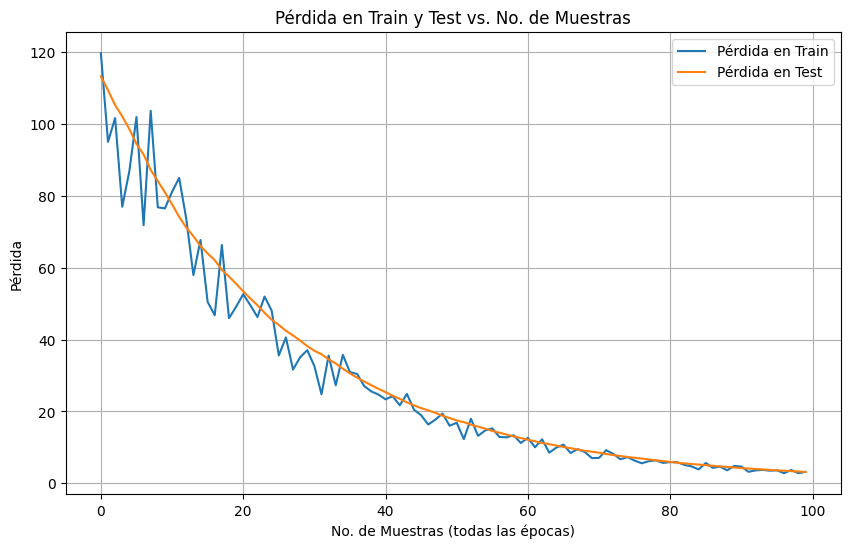

In [74]:
import matplotlib.pyplot as plt

# Graficamos las funciones de costo en train y test vs. época
plt.figure(figsize=(10, 6))
plt.plot(range((epoca+1)*n_samples), train_loss, label='Pérdida en Train')
plt.plot(range((epoca+1)*n_samples), test_loss, label='Pérdida en Test')
plt.xlabel('No. de Muestras (todas las épocas)')
plt.ylabel('Pérdida')
plt.title('Pérdida en Train y Test vs. No. de Muestras')
plt.legend()
# plt.yscale('log')
plt.grid()
plt.show()

Analice:

1. Cómo se comportan estos algoritmos? se puede ver la diferencia entre SGD y GD?.
2. Cómo afecto el _learning rate_ a estos algoritmos? Realice una simulación del mismo cambiando el `lr`.
3. Compare en una curva de Perdida vs Epoch los dos algoritmos. Nota algo interesante?

**Conclusiones:** 
1. El algoritmo de SGD necesita menos épocas que el de GD ya que durante cada época se va mejorando la predicción con cada sample. Se puede ver también que la pérdida varía mucho entre cada época para SGD (en train), pero en test la curva está suavizada.
2. Si se aumenta mucho la tasa de aprendizaje puede que el modelo "se pase" del minimo y vuelve a subir (nunca llega al mínimo). Si es muy chico el valor, entonces puede que se quede atrapado en un mínimo local y no sea buena la predicción.
3. Hay un momento (luego de N épocas) en donde la curva comienza a aplanarse y no parece mejorar mucho más. En el caso de GD, la diferencia entre la curva de la pérdida de train y la pérdida de test comienza a aumentar (se separan); pero para el caso de SGD ambas comienzan a converger al acercarse a cero. En el caso de SGD también puede verse que la curva de la pérdida es test es una curva "suave" de la curva de pérdida en train.

### Ejercicio 7

TBD